## Download the necessary packages


In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import them 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y = iris.target

target_names = iris.target_names

print("Orginal dataset shape: ", x.shape)
print("Features: ", iris.feature_names)
print("Target classes: ", target_names)



Orginal dataset shape:  (150, 4)
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:  ['setosa' 'versicolor' 'virginica']


In [2]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [3]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

print("\nPCA Results: ")
print("Explained variance ratio: ",pca.explained_variance_ratio_)
print("Total variance explained: ", (pca.explained_variance_ratio_)*100)



PCA Results: 
Explained variance ratio:  [0.72962445 0.22850762]
Total variance explained:  [72.96244541 22.85076179]


In [4]:
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y
pca_df['species_name'] = pca_df['species'].map({0:'setosa', 1: 'versicolor', 3: 'virginica'})

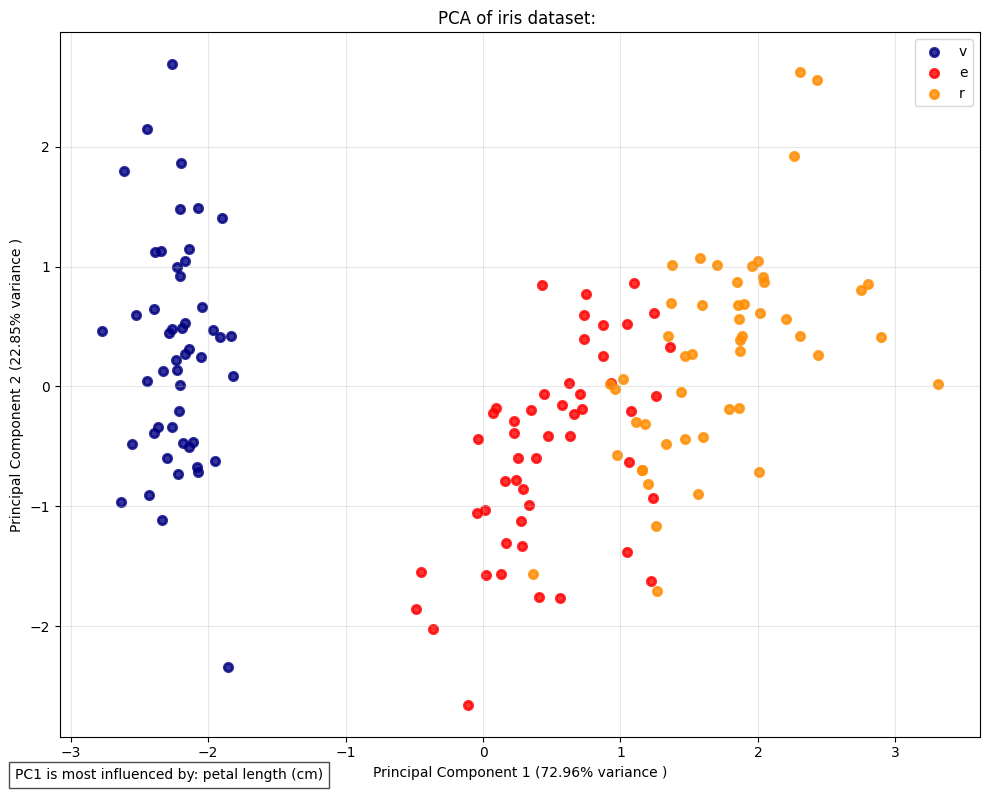

In [8]:
plt.figure(figsize=(10,8))
colors = ['navy', 'red', 'darkorange']
lw =2 

for color, i, target_names in zip(colors, [0,1,2], target_names): 
    plt.scatter(x_pca[y==i, 0], x_pca[y==i,1], color=color, alpha=0.8, lw=lw, label=target_names)
    

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of iris dataset: ')
plt.xlabel('Principal Component 1 ({:.2f}% variance )'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Principal Component 2 ({:.2f}% variance )'.format(pca.explained_variance_ratio_[1]*100))

plt.figtext(0.02, 0.02, "PC1 is most influenced by: {}".format(
    iris.feature_names[np.argmax(abs(pca.components_[0]))], 
    iris.feature_names[np.argmax(abs(pca.components_[1]))]
), fontsize = 10, bbox = dict(facecolor='white', alpha=0.7))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
print('\nPCA Details: ')
print("Components loadings: (feature contributions): ")
for i,component in enumerate (pca.components_):
    print(f"PC{i+1}: ", end=", ")
    for j, weight in enumerate(component): 
        print(f"{iris.feature_names[j]}: {weight: .3f}", end=", ")
    print()

print("\nThe two principal components explain {:2,f}% of the total variance".format(
    sum(pca.explained_variance_ratio_)*100
))


PCA Details: 
Components loadings: (feature contributions): 
PC1: , sepal length (cm):  0.521, sepal width (cm): -0.269, petal length (cm):  0.580, petal width (cm):  0.565, 
PC2: , sepal length (cm):  0.377, sepal width (cm):  0.923, petal length (cm):  0.024, petal width (cm):  0.067, 

The two principal components explain 95.813207% of the total variance
